## Framing the Problem
Your task is to build a machine learning model that predicts house prices in King County, an area in the US state of Washington, as described in Chapter 2 of the book *Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow*. Please read chapter 2 carefully in parallel. Your model should learn from the given data and be able to predict new home prices using the given metrics. Let's take a look at our given dataset:

The following code imports some packages, mounts the Google Drive folder and loads the data. Run the code and adapt the file paths!

In [ ]:
import pandas as pd
from google.colab import drive
from google.colab import data_table
import matplotlib.pyplot as plt
data_table.enable_dataframe_formatter()

drive.mount('/content/drive')
data = pd.read_csv("/content/drive/MyDrive/DIGO/kc_house_data.csv")

data.head(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045
5,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005
6,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327
7,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315
8,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337
9,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031


Description of the dataset
* id: a notation for a house
* date: Date house was sold
* price: Price is prediction target
* bedrooms: Number of Bedrooms/House
* bathrooms: Number of bathrooms/bedrooms
* sqft_living: square footage of the home 
* sqft_lot: square footage of the lot 
* floors: Total floors (levels) in house 
* waterfront: House which has a view to a waterfront
* view: Has been viewed
* condition: How good the condition is Overall 
* grade: overall grade given to the housing unit, based on King County grading system 
* sqft_above: square footage of house apart from basement 
* sqft_basement: square footage of the basement 
* yr_built: Built Year 
* yr_renovated: Year when house was renovated 
* zipcode: zip code 
* lat: Latitude coordinate 
* long: Longitude coordinate

See chapters 1 & 2 for all questions below!

What is a machine learning pipeline? Please make a fictitious example that is appropriate for our data set.

Is our task a a supervised, unsupervised, semi-supervised, self-supervised, or reinforcement learning task? Is it a classification or regression task? Do we use batch or online learning?

What is a performance measure? Give two typical examples of performance measures in regression models. How can these be interpreted in a linear regression?


It is a supervised regression task. As the data is completely extracted from a csv file and not continuosly updated it uses batch learning
RMSE, standard deviation are performance measures. RMSE can be interpreted as the mean of the errors of the regression. Standard deviation is a measure for the variance of the errors. 
A machine learning pipeline is the entirty of a machine learning data flow. In each sector data is pulled and output is generated. It starts with the data input which goes through a model to make predictions. 

##Take a Quick Look at the Data Structure

Try to use the functions *head()*, *describe()* and *info()* to get further informations of the dataset. Additional use *value_counts()* to get all possible values of one variable. For all variables, consider whether they are categorical, ordinal, or numeric! Do you notice anything about the variable waterfront when you compare it with the variable renovated?

In [ ]:

data.describe()
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
dtypes: flo

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045


Try to visualize the distributions of all the variables. (Use the *hist()* function from *matplotlib*.) Are some distributions skewed? What is right-skewed or left-skewed? Do the scales of the different variables differ? What do you notice with the variable *yr_renovated*?



*   yes, some distributions like price are (right) skewed
*   right skewed means the data has a tail on the right side, left skewed means the tail is on the left side
*it is an integer value and for some reason the rows with year renovated = 0 don't show up



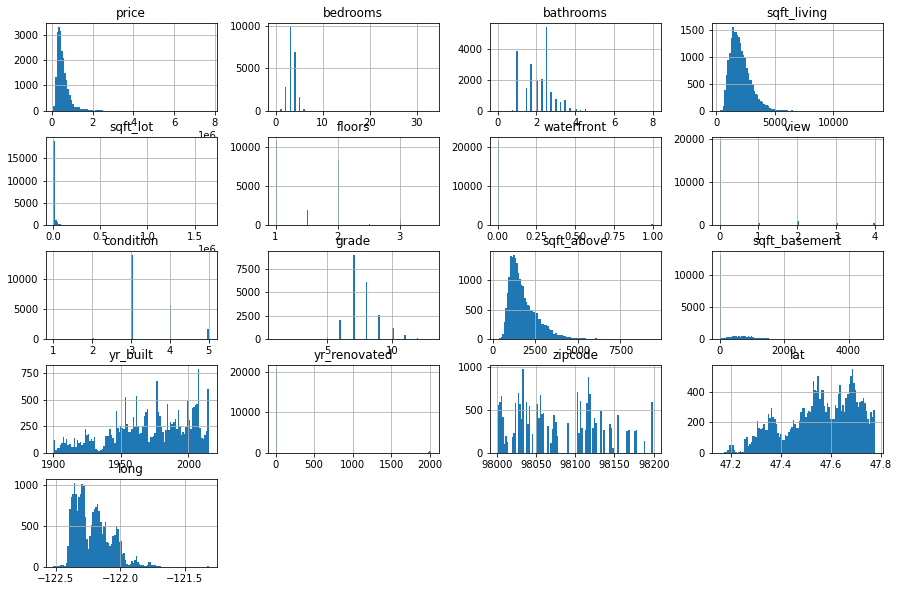

In [ ]:
data.hist(bins=100, figsize=(15, 10))
plt.show()

Unrenovated houses have the entry 0. With which variable could we replace the entry 0?

Your task is to clean the dataset: 

1. Divide the variable *yr_renovated* into two variables.
2. Create a binary variable that indicates whether the house has been renovated or not. (0 = no renovation, 1 = renovated) You can use the *cut()* function.
3. Additionally overwrite the variable *yr_renovated* with the maximum of yr_renovated and yr_built, you can use the max() function.
4. Change the *date* column to *datetime* with the function *to_datetime()*.

In [ ]:
# Some Data Cleaning
data['date'] = pd.to_datetime(data['date'])
#boolean part
data['renovated'] = pd.cut(data['yr_renovated'], bins=[0,1,10000], labels=[0,1])
data['yr_renovated'] = data[['yr_renovated','yr_built']].max(axis=1)
data.head(7)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,renovated
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,1955,98178,47.5112,-122.257,NaN
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,1933,98028,47.7379,-122.233,NaN
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,1965,98136,47.5208,-122.393,NaN
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,1987,98074,47.6168,-122.045,NaN
5,2014-05-12,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,2001,98053,47.6561,-122.005,NaN
6,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,1995,98003,47.3097,-122.327,NaN


##Create a Test Set

Try to explain what a *stratified sampling* is. Try to create a stratified train and test set, which should be named *train_set* and *test_set*. Create an extra column for this, which divides the house prices from the dataset into different categories. At the end, overwrite your dataset with the training dataset with *data = train_set.copy()*.

Stratified Sampling: Take a test set that is representative of the overall population.

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

data['category'] = pd.cut(data['price'], bins=[data['price'].min(), np.percentile(data['price'], 17.5), np.percentile(data['price'], 99), data['price'].max()], 
                          labels=['lowlife scum','boring arseholes', 'you will get the fucking rope'])
#remove NaN category rows as pandas is bitching around when trying to create strata based on a category with NaN
data2 = data.dropna(subset='category')
train_set, test_set = train_test_split(data2, test_size=0.3, stratify=data2['category'], random_state=42)
test_set['category'].value_counts()

boring arseholes                 5282
lowlife scum                     1137
you will get the fucking rope      65
Name: category, dtype: int64

In [ ]:
data = train_set.copy()
train_set.head()
data.head(50)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,renovated,category
11135,2014-07-07,685000.0,3,3.25,2030,11070,2.0,0,0,4,8,2030,0,1980,1980,98052,47.6478,-122.117,NaN,boring arseholes
12246,2015-04-30,490000.0,2,1.75,1440,6265,1.0,0,0,3,8,1440,0,2005,2005,98053,47.7028,-122.013,NaN,boring arseholes
10434,2015-03-11,294950.0,2,1.00,1060,7868,1.0,0,0,3,7,1060,0,1952,1952,98155,47.7414,-122.295,NaN,boring arseholes
6877,2014-12-29,305000.0,3,2.25,1646,12414,2.0,0,0,3,7,1646,0,1996,1996,98038,47.3630,-122.035,NaN,boring arseholes
7771,2014-12-09,276000.0,2,2.00,1480,6075,1.0,0,0,5,7,740,740,1919,1919,98118,47.5317,-122.276,NaN,lowlife scum
18007,2014-12-04,458000.0,3,4.00,1390,1569,2.0,0,0,3,9,1150,240,2006,2006,98105,47.6710,-122.269,NaN,boring arseholes
14473,2014-07-02,782000.0,2,1.50,1570,3600,1.5,0,2,4,7,1320,250,1906,1906,98119,47.6366,-122.363,NaN,boring arseholes
1925,2015-02-03,467000.0,3,2.50,1530,3984,2.0,0,0,3,8,1530,0,1995,1995,98029,47.5690,-122.007,NaN,boring arseholes
1818,2014-09-11,1430000.0,4,2.50,3380,27589,2.0,0,0,3,10,3380,0,1966,1966,98004,47.6292,-122.225,NaN,boring arseholes
16969,2014-07-29,3100000.0,5,5.25,5090,23669,2.0,0,0,3,12,5090,0,2006,2006,98004,47.6297,-122.216,NaN,you will get the fucking rope


##Explore and Visualize the Data to Gain Insights

First, try to visualize the geographic dates (*lat*, *long*) from our dataset in a scatter plot. Where are the expensive houses located? For example, you can use a logarithmic color bar to see where it is cheaper and more expensive. Consider how to combine the 'lat' and 'long' features into a simpler feature. (No implementation, but a consideration is sufficient).

<Axes: xlabel='long', ylabel='lat'>

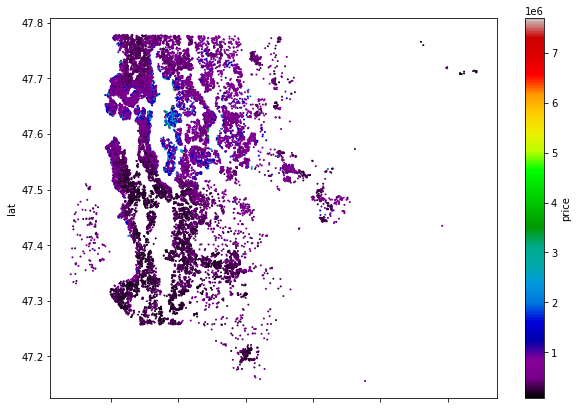

In [ ]:
prc = data['renovated']
data.plot(kind='scatter', x='long', y='lat', c='price', cmap='nipy_spectral', s=1, figsize=(10,7))
#lat and long could be combined into country or city 

### Correlations

Since the dataset does not have so many features, it is quite easy to calculate the correlations of these. Please calculate all meaningful standard correlation effects with the function *corr()*. How can the values of this correlation effect be interpreted? What are probably the best variables to predict? For which variables does the Pearson coefficient make sense and for which not?

In [ ]:
all_corr = data.corr()
all_corr['price'].sort_values(ascending=False)
#pearson does make sense for all variables that give a numerical representation of qualities of a house like bedrooms, living room,the grade etc and price. 
#does not make sense for ZIP code. Correlation between price, long, lat are interesting because they show that there is 
#correlation between North/South position and price but not so much between East/Weast Positioning 

price            1.000000
sqft_living      0.700884
grade            0.679938
sqft_above       0.605191
bathrooms        0.528105
view             0.396834
sqft_basement    0.321589
lat              0.316301
bedrooms         0.311986
floors           0.264519
waterfront       0.252050
yr_renovated     0.111657
sqft_lot         0.100049
yr_built         0.059480
condition        0.030637
long             0.024713
zipcode         -0.045205
Name: price, dtype: float64

Additionally, create a scatter plot for the most important features using the Pandas scatter_matrix() function. What do you notice about the variables sqft_living, sqft_above and sqft_basement? 

there seems to be a correlation between living space and price. notably the basement seems to have many exceptions from that as there are pricy houses with all sizes of basement.
There are some houses without a basement.

array([[<Axes: xlabel='price', ylabel='price'>,
        <Axes: xlabel='sqft_above', ylabel='price'>,
        <Axes: xlabel='sqft_basement', ylabel='price'>,
        <Axes: xlabel='sqft_living', ylabel='price'>],
       [<Axes: xlabel='price', ylabel='sqft_above'>,
        <Axes: xlabel='sqft_above', ylabel='sqft_above'>,
        <Axes: xlabel='sqft_basement', ylabel='sqft_above'>,
        <Axes: xlabel='sqft_living', ylabel='sqft_above'>],
       [<Axes: xlabel='price', ylabel='sqft_basement'>,
        <Axes: xlabel='sqft_above', ylabel='sqft_basement'>,
        <Axes: xlabel='sqft_basement', ylabel='sqft_basement'>,
        <Axes: xlabel='sqft_living', ylabel='sqft_basement'>],
       [<Axes: xlabel='price', ylabel='sqft_living'>,
        <Axes: xlabel='sqft_above', ylabel='sqft_living'>,
        <Axes: xlabel='sqft_basement', ylabel='sqft_living'>,
        <Axes: xlabel='sqft_living', ylabel='sqft_living'>]], dtype=object)

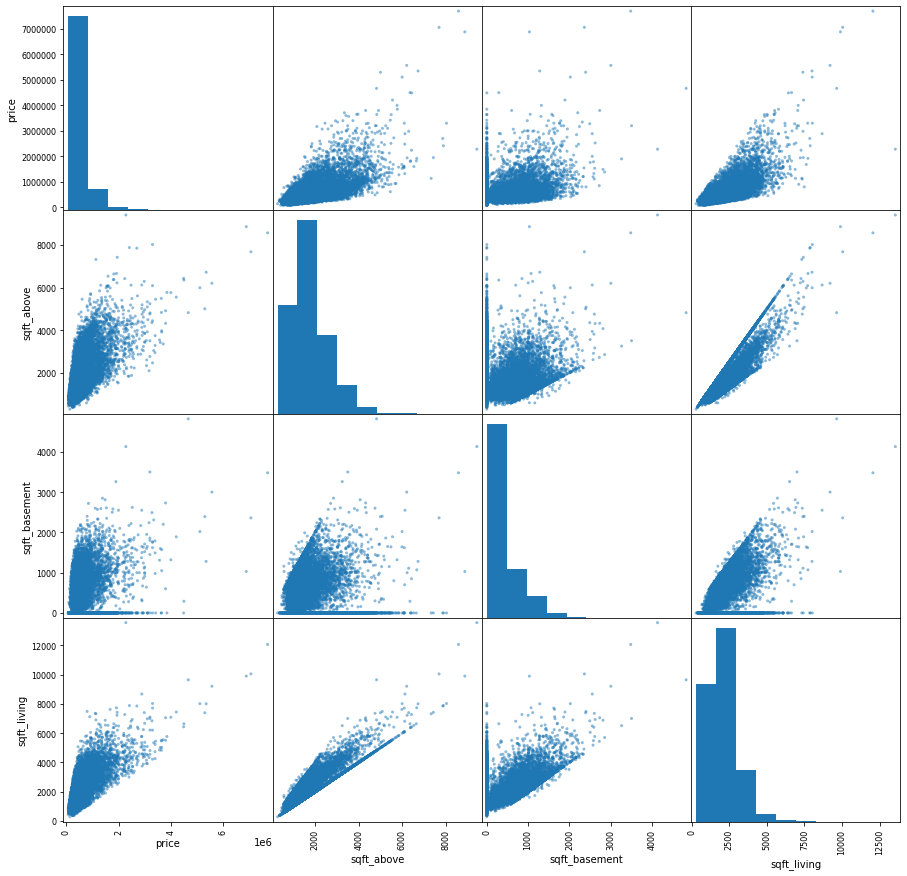

In [ ]:
pd.plotting.scatter_matrix(data[['price', 'sqft_above', 'sqft_basement', 'sqft_living']], figsize =[15, 15])


## Experiment with Attribute Combinations

Try to combine the columns bedrooms, sqft_living by calculating the bedroom density, i.e. *bedrooms/sqft_living*. Check the new Pearson Correlation coefficients.


In [ ]:
data['density'] = data['bedrooms']/data['sqft_living']

data['price']

data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,renovated,category,density
11135,2014-07-07,685000.0,3,3.25,2030,11070,2.0,0,0,4,...,2030,0,1980,1980,98052,47.6478,-122.117,NaN,boring arseholes,0.001478
12246,2015-04-30,490000.0,2,1.75,1440,6265,1.0,0,0,3,...,1440,0,2005,2005,98053,47.7028,-122.013,NaN,boring arseholes,0.001389
10434,2015-03-11,294950.0,2,1.00,1060,7868,1.0,0,0,3,...,1060,0,1952,1952,98155,47.7414,-122.295,NaN,boring arseholes,0.001887
6877,2014-12-29,305000.0,3,2.25,1646,12414,2.0,0,0,3,...,1646,0,1996,1996,98038,47.3630,-122.035,NaN,boring arseholes,0.001823
7771,2014-12-09,276000.0,2,2.00,1480,6075,1.0,0,0,5,...,740,740,1919,1919,98118,47.5317,-122.276,NaN,lowlife scum,0.001351


##Prepare the Data for Machine Learning Algorithms

In the first step, we separate our trainings dataset with our labeled dataset.

In [ ]:
data = train_set.drop("price", axis=1)
data_label = train_set[["price"]].copy()

###Missing Data

What options do we have to deal with missing values? What options do we have to deal with missing values? Write a code that give all lines, which have any missing value. What is the function *SimpleImputer(strategy="median")* doing?

In [ ]:
#YOUR TASK: Write a code that give all lines, which have any missing value. 
data.isna()
#simpleimputer could replace missing values with averages or stuff like that 

Output hidden; open in https://colab.research.google.com to view.

###Handling Text and Categorical Attributes


What are ordinal and categorical data? Do we have such data in our data set? What possibilities do we have to transform this data correctly? What are dummy attributes? Try to understand what the function *OneHotEncoder()* does with the variable waterfront.

Ordinal data is ordered by numbers in someway like height or living room. Catergorial data puts datapoints in categories like flat or house. We have zipcodes as categorial data and waterfront. To deal with this in a machine learning context one can use onehotencoder to transform the categorial data into vectors with only 1 not 0 value to represent the category. The newly created columns for the vector are also called dummy variables.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

waterfront = data[['waterfront']]

cat_encoder = OneHotEncoder()


waterfront_encoded = cat_encoder.fit_transform(waterfront)


##Feature Scaling and Transformation

What is min-max scaling and standardization of features? What is a heavy tail in a distribution? What problem do we have with min-max scaling and standardization on a heavy-tailed distribution? Can you make an example?

min max: scale a feature to a 0 - 1 float based upon its minimum and maximum level.
standardization: substract the mean and devide by standard deviation. not as effected by outliers as normalization/minmax min max scaling might be a sensible aproach for variables like density of betrooms as they tend to be really small. A heavy tail distribution has many datapoints relatively far away from the mean. The values on the tails of the distribution will be squashed into a small range with both transformations. An example for a heavy tail distribution might be years spent in prison in the general population.


In [ ]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'renovated', 'category'],
      dtype='object')

Try to brainstorm which variable conversion makes sense for which variable! Write down your guess! Try to understand the following two code blocks, how are the variables *long* and *lat* converted?



*   Normalize room numbers, floors and grade
*   Standardize price and all columns in sqft

The data is clustered around 15 centers of price points. There is a decay applied to datapoints further away from the center.




In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.base import BaseEstimator, TransformerMixin

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


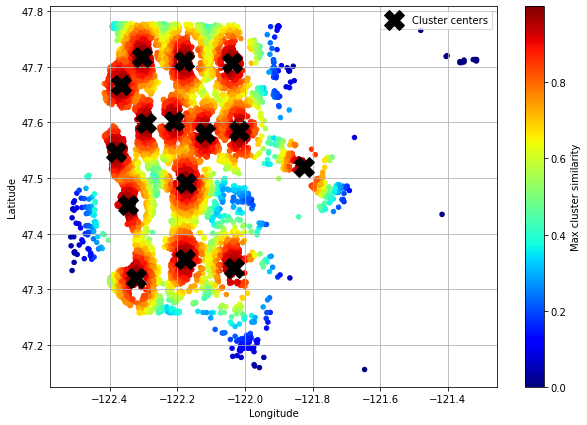

In [ ]:
cluster_simil = ClusterSimilarity(n_clusters=15, gamma=100., random_state=42)
similarities = cluster_simil.fit_transform(data[["lat", "long"]],
                                           sample_weight=data_label["price"])

data_renamed = data.rename(columns={
    "lat": "Latitude", "long": "Longitude"})

data_renamed["Max cluster similarity"] = similarities.max(axis=1)

data_renamed.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
                     c="Max cluster similarity",
                     cmap="jet", colorbar=True,
                     legend=True, sharex=False, figsize=(10, 7))
plt.plot(cluster_simil.kmeans_.cluster_centers_[:, 1],
         cluster_simil.kmeans_.cluster_centers_[:, 0],
         linestyle="", color="black", marker="X", markersize=20,
         label="Cluster centers")
plt.legend(loc="upper right")

plt.show()

Have a look at my suggestion of variable conversion. I ask you to understand the code in detail, what variable transformations have I made? What arguments are in favor, and what arguments might be against? How would you convert the variables if you compare it with your guess?

log_pipline takes the logarithm of right skewed variables, cluster_simil cluster along lat and long, waterfront and renovated are one hot encoded, date is transformed as a date and the rest standard scaled. I would just use your solution.

In [66]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.preprocessing import OneHotEncoder

def time(X):
 a =  pd.to_datetime("now") - X[X.columns[0]]
 a = a.dt.total_seconds()
 return a.to_frame()

date_pipeline = make_pipeline(
 FunctionTransformer(time),
 StandardScaler())

cluster_simil = ClusterSimilarity(n_clusters=15, gamma=100., random_state=42)

default_num_pipeline = make_pipeline(StandardScaler())

log_pipeline = make_pipeline(
 FunctionTransformer(np.log),
 StandardScaler())

label_pipeline = make_pipeline(
 FunctionTransformer(np.log)) 

cat_pipeline = make_pipeline(OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
 ("log", log_pipeline, ["sqft_living", "sqft_lot", "sqft_above"]),
 ("geo", cluster_simil, ["lat", "long"]),
 ("cat", cat_pipeline, ["waterfront", "renovated"]),
 ("date", date_pipeline, ["date"]),
 ("normal", default_num_pipeline, ["yr_built", "yr_renovated", "bedrooms", "bathrooms", "floors", "view", "condition", "grade"])
 ])

preprocessing_label = ColumnTransformer([
 ("log", label_pipeline, ["price"])
 ])

How many features do we have for predicition?

In [67]:
#16

NotFittedError: ignored

In [69]:
data_prepared = preprocessing.fit_transform(data)
data_prepared.shape

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


(15128, 31)

##Select and Train a Model

###Linear Model

The following code determines a linear regression model, again try to explain what the code computes!

In [70]:
from sklearn.linear_model import LinearRegression

data_label_transformed = preprocessing_label.fit_transform(data_label)

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(data, data_label_transformed)

data_predictions = lin_reg.predict(data)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
/usr/local/lib/python3.9/dist-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


Your task is to determine the median of the absolute error [Median(ABS(a-b))] (In addition, you can also get the percentage error by dividing by the actual sales value before taking the median.) and the Root Mean Square Error (RMSE)! Remember that estimates are logarithmic. Also calculate the median of all home prices. And try to evaluate all error values. How good is the model?

In [71]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error

rmse = mean_squared_error(data_label_transformed, data_predictions)
med  = median_absolute_error(data_label_transformed, data_predictions)

print(rmse)
print(med)

0.041896852821327185
0.11795715332337497


###Random Forest Regressor

We will now also compute a Radom Forrest model, automatically determining a cross validation with n = 10 on the training dataset. What happens during the cross validation? Why have I adjusted the R squared error with a separate function? What is the function *np.ravel* doing?

During cross validation the training set is split into non overlapping subsets and trained on each to determine the best (validation). The R squared error is adjusted because cross val score returns a negative value as it expects a utility not a cost function. 

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer

data_label_transformed = preprocessing_label.fit_transform(data_label)

forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))
forest_reg.fit(data, np.ravel(data_label_transformed))

def adjusted_rsquare(y_true, y_pred, **kwargs):
  return -np.sqrt(np.mean((np.exp(y_true)-np.exp(y_pred))**2))

neg_exp_root_mean_squared_error = make_scorer(adjusted_rsquare, greater_is_better=False)

forest_rmses = -cross_val_score(forest_reg, data, np.ravel(data_label_transformed),
 scoring=neg_exp_root_mean_squared_error, cv=10)



The following code outputs the RMSE for all 10 folds, compare it to the linear regression.

In [73]:
pd.Series(forest_rmses).describe()

count        10.000000
mean    -127485.460958
std       10262.427016
min     -140276.042661
25%     -135741.260194
50%     -127986.379500
75%     -121135.798745
max     -108961.134737
dtype: float64

##Fine-Tune Your Model

###Grid Search & Randomized Search
Try to explain what the Grid Search and Random Search methods do. What are the advantages of each method. For which parameters would this make sense in our example?

They both search for hyperparameters. Grid search takes hyperparameters you want to optimize and cross validates every combination of them. Randomized search does essentially the same but randomly picks hyperparameters to fiddle around with. For our model Grid search would make sense as the number of hyperparameters is small.

###Evaluate Your System on the Test Set

Try to evaluate the final model with the test set. Compute the Median and 95% confidence interval of the root mean squared error and the median of the absolute error.

Remember to invert your results with the inverse functions you applied to the label variable as a preprocessing step. (The logarithm is the inverse function of the exponential function).

In [190]:
from sklearn.metrics import mean_squared_log_error
from scipy import stats
import math
xt = test_set.drop("price", axis=1)
yt = test_set["price"].copy()

test_label_transformed = preprocessing_label.fit_transform(data_label)
Ran_Forest_prediction = forest_reg.predict(xt)
Ran_Forest_prediction=Ran_Forest_prediction.reshape((-1,1))

f_rmse = mean_squared_log_error (yt, Ran_Forest_prediction, squared=False)
f_med  = median_absolute_error(yt, Ran_Forest_prediction)

confidence = 0.95
fuk = (yt.to_numpy())
#get squared errors
squared_errors = (np.exp(Ran_Forest_prediction[:,0][:]) - fuk[:]) ** 2

#print(squared_errors)

#confidence interval
huso = np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=(squared_errors).mean(),
                         scale=stats.sem((squared_errors))))
print(huso)
print(f_rmse)
print(f_med)
#print(math.log(f_med))

/usr/local/lib/python3.9/dist-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


[125088.3312739  183418.16628007]
10.417945261088947
449986.98975063016


##Launch, Monitor, and Maintain Your System

What package and code can we use to save and reload our model?

Why is it possible that we need a monitoring code?

Try to save our learned model so that we can reload it at any time.

Monitoring might be needed to watch over the models live performance.
Use joblib

In [191]:
import joblib

joblib.dump(forest_reg, "RandomForestModel")

['RandomForestModel']

##Ideas for the Learning Portfolio

1) Adding a further model: In a few weeks we will learn neural networks, try to add this model!

2) Find a challenge on Kaggle for a regression dataset and use Chapter 2 and this colab to try to solve it. 